In [1]:
# Import modules
import numpy as np
import pandas as pd
import os
from geopy.distance import great_circle
%matplotlib inline
%pwd
import matplotlib.pyplot as plt

In [2]:
# Import data 
os.chdir('/Users/karthik/Documents/Codebase/UMD_Data_Challenge/data/airline_tails/')
airchina = pd.read_csv('air_china.csv', delimiter = ',')
allnippon = pd.read_csv('all_nippon.csv', delimiter = ',')
american = pd.read_csv('american.csv', delimiter = ',')
britishairways = pd.read_csv('british_airways.csv', delimiter = ',')
chinaeast = pd.read_csv('china_eastern.csv', delimiter = ',')
chinasouth = pd.read_csv('china_southern.csv', delimiter=',')
delta = pd.read_csv('delta.csv', delimiter = ',')
emirates = pd.read_csv('emirates.csv', delimiter = ',')
etihad = pd.read_csv('etihad.csv', delimiter = ',')
lufthansa = pd.read_csv('lufthansa.csv', delimiter = ',')
qatar = pd.read_csv('qatar.csv', delimiter = ',')
ryan = pd.read_csv('ryanair.csv', delimiter = ',')
united = pd.read_csv('united.csv', delimiter = ',')
routes = pd.read_csv('../../../Airline_Analysis/data/routes.csv', delimiter=',')
airports = pd.read_csv('./../../codebeautify4.csv', delimiter=',')

In [6]:
# Define functions
def fleet_distance(airline_code):
    fleet_dist_arr = []
    for i, row in routes.iterrows():
        if row['Airline'] == airline_code :
            dist = get_dist(row['Source_IATA'], row['Dest_IATA'])
            fleet_dist_arr.append(np.floor(dist))
    fleet_dist_arr = np.unique(fleet_dist_arr)
    plt.hist(fleet_dist_arr,bins=7)
    return pd.DataFrame(fleet_dist_arr)

def get_dist(src, dst):
    try:
        dst_index = np.asscalar(np.where(airports['iata'] == dst)[0])
        src_index = np.asscalar(np.where(airports['iata'] == src)[0])
        src = (airports['lat'][src_index], airports['lon'][src_index])
        dst = (airports['lat'][dst_index], airports['lon'][dst_index])
        return great_circle(src, dst).miles
    except ValueError:
        return 500

CPU times: user 1min 3s, sys: 339 ms, total: 1min 3s
Wall time: 1min 3s


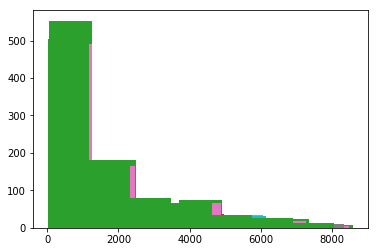

In [7]:
%%time
CA = fleet_distance('CA') # Air China
NH = fleet_distance('NH') # All Nippon
AA = fleet_distance('AA') # American
BA = fleet_distance('BA') # British
MU = fleet_distance('MU') # China East
CZ = fleet_distance('CZ') # Chize South
DL = fleet_distance('DL') # Delta
EK = fleet_distance('EK') # Emirates
EY = fleet_distance('EY') # Etihad
LH = fleet_distance('LH') # Lufthansa
FR = fleet_distance('FR') # Ryanair
QR = fleet_distance('QR') # Qatar
UA = fleet_distance('UA') # United

In [26]:
data_dist = [CA,NH,AA,BA,MU,CZ,DL,EK,EY,LH,FR,QR,UA]
#plt.plot(data_dist)
#data_dist = list(map(list, zip(*data_dist)))
#data_dist = np.asarray(data_dist)
test_df = pd.concat([CA,NH,AA,BA,MU,CZ,DL,EK,EY,LH,FR,QR,UA], axis=0, ignore_index=True)

In [48]:
QR.describe()

,0
count,140.000000
mean,2251.685714
std,1785.390041
min,90.000000
25%,818.500000
50%,1941.500000
75%,3207.250000
max,8037.000000


In [ ]:
data_dist.columns = ['Air China', 'All Nippon', 'American', 'British Airways', 'China Eastern', 'China Southern', 'Delta', 'Emirates', 'Etihad','Lufthansa',
                  'Ryanair', 'Qatar','United']

In [12]:
np.savetxt('dist_compiled.csv',data_dist)

ValueError: cannot copy sequence with size 496 to array axis with dimension 1